In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_iris
from matplotlib.colors import LightSource
from tabulate import tabulate
from time import perf_counter
from sklearn.datasets import load_breast_cancer
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import MultipleLocator
from sklearn.model_selection import train_test_split
from time import perf_counter
from sklearn.preprocessing import LabelBinarizer
import random
from gensim.models import KeyedVectors
import pandas as pd
import seaborn as sns



2023-04-10 15:37:34.174116: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-10 15:37:34.174132: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Ejercicio 1.A

y_true=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

y_pred=np.array([0.18395704, 0.18395704, 0.18506491, 0.18799731, 0.18395704,
       0.24096969, 0.18395704, 0.18799731, 0.18395704, 0.18799731,
       0.18799731, 0.21094593, 0.18395704, 0.19304448, 0.18862939,
       0.18799731, 0.18506491, 0.18395704, 0.24096969, 0.18799731,
       0.24096969, 0.18799731, 0.19747499, 0.24096969, 0.30332845,
       0.21094593, 0.21094593, 0.18799731, 0.18395704, 0.21094593,
       0.21094593, 0.18799731, 0.18799731, 0.18395704, 0.18799731,
       0.18862939, 0.18506491, 0.18395704, 0.18506491, 0.18799731,
       0.18506491, 0.18506491, 0.18506491, 0.21094593, 0.30332845,
       0.18395704, 0.21094593, 0.18395704, 0.18799731, 0.18395704,
       0.95087045, 0.93909526, 0.9602022 , 0.89205027, 0.9452805 ,
       0.93909526, 0.95087045, 0.75592554, 0.9452805 , 0.8777893 ,
       0.8039025 , 0.9162346 , 0.89205027, 0.95087045, 0.82506734,
       0.9322611 , 0.93909526, 0.9048277 , 0.93909526, 0.8777893 ,
       0.955778  , 0.89205027, 0.9602022 , 0.95087045, 0.92472136,
       0.9322611 , 0.955778  , 0.9638314 , 0.93909526, 0.8039025 ,
       0.8619356 , 0.8443901 , 0.8777893 , 0.96697116, 0.93909526,
       0.93909526, 0.95087045, 0.9322611 , 0.9048277 , 0.89205027,
       0.9322611 , 0.9452805 , 0.89205027, 0.75592554, 0.9162346 ,
       0.9162346 , 0.9162346 , 0.92472136, 0.6703734 ])

def loss_mae(y_true,y_pred):
  error=np.abs(y_true-y_pred)

  return np.sum(error)/error.shape[0]

def loss_mse(y_true,y_pred):
   error=(y_true-y_pred)**2

   return np.sum(error)/error.shape[0]



print(f"Cost MAE={loss_mae(y_true,y_pred):.4f}")
print(f"Cost MSE={loss_mse(y_true,y_pred):.4f}")


Cost MAE=0.1470
Cost MSE=0.0265


In [3]:
#Ejercicio 1.B

print(f"Cost MAE={tf.keras.losses.mean_absolute_error(y_true,y_pred):.4f}")
print(f"Cost MSE={tf.keras.losses.mean_squared_error(y_true,y_pred):.4f}")



Cost MAE=0.1470
Cost MSE=0.0265


2023-04-10 15:37:35.576123: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-04-10 15:37:35.576142: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-10 15:37:35.576158: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (beren): /proc/driver/nvidia/version does not exist
2023-04-10 15:37:35.576396: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
#Ejercicio 2
y_true=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

y_pred_red_a=np.array([0.18395704, 0.18395704, 0.18506491, 0.18799731, 0.18395704,
       0.24096969, 0.18395704, 0.18799731, 0.18395704, 0.18799731,
       0.18799731, 0.21094593, 0.18395704, 0.19304448, 0.18862939,
       0.18799731, 0.18506491, 0.18395704, 0.24096969, 0.18799731,
       0.24096969, 0.18799731, 0.19747499, 0.24096969, 0.30332845,
       0.21094593, 0.21094593, 0.18799731, 0.18395704, 0.21094593,
       0.21094593, 0.18799731, 0.18799731, 0.18395704, 0.18799731,
       0.18862939, 0.18506491, 0.18395704, 0.18506491, 0.18799731,
       0.18506491, 0.18506491, 0.18506491, 0.21094593, 0.30332845,
       0.18395704, 0.21094593, 0.18395704, 0.18799731, 0.18395704,
       0.95087045, 0.93909526, 0.9602022 , 0.89205027, 0.9452805 ,
       0.93909526, 0.95087045, 0.75592554, 0.9452805 , 0.8777893 ,
       0.8039025 , 0.9162346 , 0.89205027, 0.95087045, 0.82506734,
       0.9322611 , 0.93909526, 0.9048277 , 0.93909526, 0.8777893 ,
       0.955778  , 0.89205027, 0.9602022 , 0.95087045, 0.92472136,
       0.9322611 , 0.955778  , 0.9638314 , 0.93909526, 0.8039025 ,
       0.8619356 , 0.8443901 , 0.8777893 , 0.96697116, 0.93909526,
       0.93909526, 0.95087045, 0.9322611 , 0.9048277 , 0.89205027,
       0.9322611 , 0.9452805 , 0.89205027, 0.75592554, 0.9162346 ,
       0.9162346 , 0.9162346 , 0.92472136, 0.6703734 ])

y_pred_red_b=np.array([0.1359098 , 0.1359098 , 0.13724494, 0.1496709 , 0.1359098 ,
       0.20224485, 0.1359098 , 0.1496709 , 0.1359098 , 0.1496709 ,
       0.1496709 , 0.17425027, 0.1359098 , 0.14369074, 0.13939261,
       0.1496709 , 0.13724494, 0.1359098 , 0.20224485, 0.1496709 ,
       0.20224485, 0.1496709 , 0.14819524, 0.20224485, 0.27304262,
       0.17425027, 0.17425027, 0.1496709 , 0.1359098 , 0.17425027,
       0.17425027, 0.1496709 , 0.1496709 , 0.1359098 , 0.1496709 ,
       0.13939261, 0.13724494, 0.1359098 , 0.13724494, 0.1496709 ,
       0.13724494, 0.13724494, 0.13724494, 0.17425027, 0.27304262,
       0.1359098 , 0.17425027, 0.1359098 , 0.1496709 , 0.1359098 ,
       0.98840487, 0.98393154, 0.99160326, 0.95883477, 0.9863478 ,
       0.98393154, 0.98840487, 0.854748  , 0.9863478 , 0.9503383 ,
       0.8971007 , 0.97183764, 0.95883477, 0.98840487, 0.9138802 ,
       0.98081565, 0.98393154, 0.9659298 , 0.98393154, 0.9503383 ,
       0.99015427, 0.95883477, 0.99160326, 0.98840487, 0.97674596,
       0.98081565, 0.99015427, 0.99284065, 0.98393154, 0.8971007 ,
       0.9401976 , 0.92814255, 0.9503383 , 0.9938967 , 0.98393154,
       0.98393154, 0.98840487, 0.98081565, 0.9659298 , 0.95883477,
       0.98081565, 0.9863478 , 0.95883477, 0.854748  , 0.97183764,
       0.97183764, 0.97183764, 0.97674596, 0.76543546]) 

     
print(f"Red A MAE={tf.keras.losses.mean_absolute_error(y_true,y_pred_red_a):.4f} MSE={tf.keras.losses.mean_squared_error(y_true,y_pred_red_a):.4f}")
print(f"Red B MAE={tf.keras.losses.mean_absolute_error(y_true,y_pred_red_b):.4f} MSE={tf.keras.losses.mean_squared_error(y_true,y_pred_red_b):.4f}")


Red A MAE=0.1470 MSE=0.0265
Red B MAE=0.0979 MSE=0.0145


In [5]:
#Ejercicio 3
def plot_metrics(axes,title,history,metrics):

    for metric in metrics:

      if (metric.startswith("val_")):
        momento="validación"
        linestyle="solid"
      else:
        momento="entrenamiento"
        linestyle="dotted"

      loss=history[metric][-1]   
      axes.plot(history[metric],linestyle=linestyle,label=f"{metric} {momento}:{loss:.2f}")  


    axes.set_xlabel('Nº Épocas', fontsize=13,color="#003B80") 
    axes.xaxis.set_major_locator(MaxNLocator(integer=True))

    axes.set_ylabel('Métricas', fontsize=13,color="#003B80")
    axes.set_ylim(ymin=0,ymax=1.1)
    axes.yaxis.set_major_locator(MultipleLocator(0.1))

    axes.set_title(title)
    axes.set_facecolor("#F0F7FF")
    axes.grid(visible=True, which='major', axis='both',color="#FFFFFF",linewidth=2)
    axes.legend()

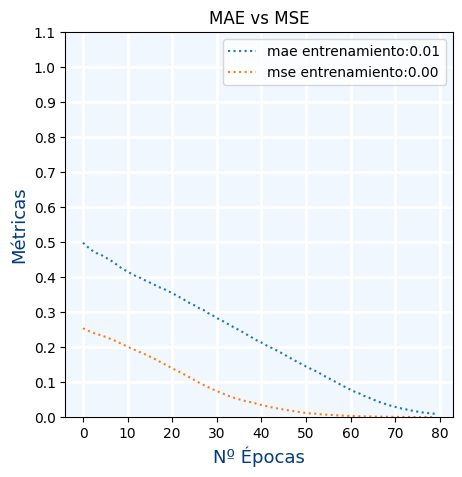

In [6]:
#Ejercicio 3

def get_data():
  iris=load_iris()
  x=np.array(iris.data[0:99,2])
  y_true=np.array(iris.target[0:99])

  return x,y_true

def get_model(loss):
  model=Sequential()
  model.add(Dense(2, input_dim=1,activation=tf.keras.layers.LeakyReLU()))
  model.add(Dense(4, input_dim=1,activation=tf.keras.layers.LeakyReLU()))
  model.add(Dense(8, input_dim=1,activation=tf.keras.layers.LeakyReLU()))           
  model.add(Dense(16, input_dim=1,activation=tf.keras.layers.LeakyReLU()))
  model.add(Dense(8, input_dim=1,activation=tf.keras.layers.LeakyReLU())) 
  model.add(Dense(4, input_dim=1,activation=tf.keras.layers.LeakyReLU()))
  model.add(Dense(1,activation="sigmoid"))
  model.compile(loss=loss)

  return model

def fit(model,x,y_true):
    history=model.fit(x,y_true,epochs=80,verbose=False) 

    return history


x,y_true=get_data()

model_mae=get_model("mae")
history_mae=fit(model_mae,x,y_true)

model_mse=get_model("mse")
history_mse=fit(model_mse,x,y_true)

history={
    "mae":history_mae.history['loss'],
    "mse":history_mse.history['loss']
}


figure=plt.figure(figsize=(5, 5))
axes = figure.add_subplot(1,1,1)
plot_metrics(axes,"MAE vs MSE",history,['mae','mse'])




In [7]:
#Ejercicio 4

def get_data():
  iris=load_iris()
  x=np.array(iris.data[0:99,2])
  y_true=np.array(iris.target[0:99])

  return x,y_true

def get_model(loss):

  np.random.seed(5)
  tf.random.set_seed(5)
  random.seed(5) 

  model=Sequential()
  model.add(Dense(3, input_dim=1,activation="relu"))
  model.add(Dense(1,activation="sigmoid"))
  model.compile(loss=loss)

  return model

def fit(model,x,y_true):
    history=model.fit(x,y_true,epochs=80,verbose=False) 

    return history


x,y_true=get_data()

model=get_model("mse")
history=fit(model,x,y_true)

y_pred=model.predict(x,verbose=False).reshape((-1))

print(f"MSE loss      ={history.history['loss'][-1]:.5f}")
print(f"MSE Mi función={loss_mse(y_true,y_pred):.5f}")
print(f"MSE Keras     ={tf.keras.losses.mean_squared_error(y_true,y_pred):.5f}")




MSE loss      =0.13711
MSE Mi función=0.13626
MSE Keras     =0.13626


In [8]:
#Ejercicio 5.A
from gensim.models import KeyedVectors
from gensim.test.utils import datapath

wv = KeyedVectors.load_word2vec_format(("sbw_vectors.bin"), binary=True)

print("Nº de palabras=",len(wv))

similaridad_padre_madre=wv.similarity('padre', 'madre')
print("Similaridad padre y madre=",similaridad_padre_madre)

Nº de palabras= 1000653
Similaridad padre y madre= 0.83481336


In [9]:
#Ejercicio 5.B
print("Similaridad verdura , lechuga=",wv.similarity('verdura', 'lechuga'))
print("Similaridad tigre , gato=",wv.similarity('tigre', 'gato'))
print("Similaridad movil , android=",wv.similarity('movil', 'android'))
print("Similaridad tiburón , libro=",wv.similarity('tiburón', 'libro'))
print("Similaridad matemáticas , hijo=",wv.similarity('matemáticas', 'hijo'))

Similaridad verdura , lechuga= 0.7566153
Similaridad tigre , gato= 0.6647046
Similaridad movil , android= 0.61801255
Similaridad tiburón , libro= 0.21253517
Similaridad matemáticas , hijo= 0.15265462


<AxesSubplot: xlabel='palabra_x', ylabel='palabra_y'>

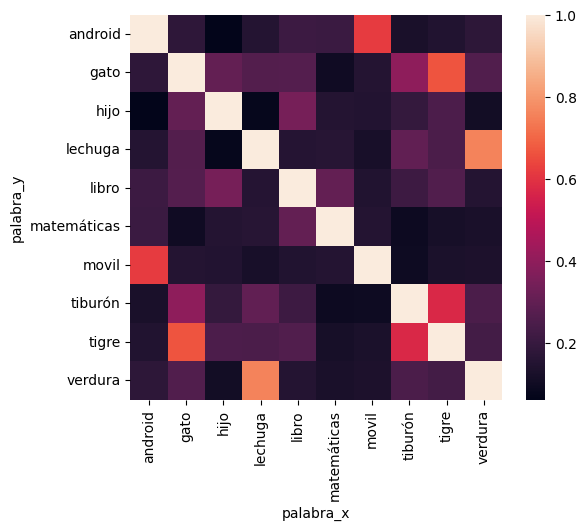

In [10]:
#Ejercicio 5.C
palabras=["verdura","lechuga","tigre","gato","movil","android","tiburón","libro","matemáticas","hijo"]

similarities=[]
for palabra_x in palabras:
    for palabra_y in palabras:
        similarity=wv.similarity(palabra_x, palabra_y)
        similarities.append([palabra_x, palabra_y,similarity])

df=pd.DataFrame(similarities, columns=['palabra_x', 'palabra_y','distancia_coseno'])
df = df.pivot(index='palabra_y', columns='palabra_x', values='distancia_coseno')

figure=plt.figure(figsize=(6, 5))
axes = figure.add_subplot(1,1,1)
sns.heatmap(df,ax=axes)


In [11]:
#Ejercicio 5.D
print("Palabras similares a la palabra 'rey':")
print(*wv.most_similar_cosmul(positive=['rey']), sep='\n')
print()
print("Palabras similares a la palabra 'rey' y 'mujer' es decir 'reina':")
print(*wv.most_similar_cosmul(positive=['rey','mujer']), sep='\n')
print()
print("Palabras similares a la palabra 'rey' y 'mujer' pero sin relación con 'hombre':")
print(*wv.most_similar_cosmul(positive=['rey','mujer'],negative=['hombre']), sep='\n')

Palabras similares a la palabra 'rey':
('monarca', 0.9016660451889038)
('reyes', 0.882427990436554)
('reino', 0.8799194097518921)
('príncipe', 0.8663479089736938)
('reina', 0.8626893162727356)
('Harthacnut', 0.852287769317627)
('Ragnald', 0.851220965385437)
('Sverkersson', 0.8501701354980469)
('regente', 0.8492355346679688)
('Hardeknut', 0.8488398194313049)

Palabras similares a la palabra 'rey' y 'mujer' es decir 'reina':
('Rhaena', 0.628268301486969)
('reina', 0.6224279999732971)
('Artaínta', 0.618444561958313)
('desposándose', 0.6175896525382996)
('Freawaru', 0.6154372692108154)
('Alysanne', 0.6145092844963074)
('Geirhild', 0.6131218075752258)
('desposara', 0.6127710938453674)
('Hunifrido', 0.6121680736541748)
('Audovera', 0.6118815541267395)

Palabras similares a la palabra 'rey' y 'mujer' pero sin relación con 'hombre':
('reina', 0.9869030117988586)
('consorte', 0.9551905989646912)
('princesa', 0.9417096972465515)
('Olofsdotter', 0.9130518436431885)
('Eriksdotter', 0.9102799892425

### Ejercicio 5.E

  * Lo más sencillo es para un programa que sugiere sinónimos.
  * Otra aplicación sería una banco de imágenes etiquetada con palabras donde el usuario busca fotos por palabras y la app no solo buscaría por las palabras que ha indicado el usuario sino por palabras relacionadas.



## Ejercicio 6






  * Obtener el consumo de un coche según las distintas condiciones climáticas, la carretera y el tipo de coche
    * MSE
  * Averiguar si un paciente tendrá diabetes en el futuro según una serie de analíticas que se han ido haciendo a lo largo de su vida.
    * Binary Cross Entropy
  * Distinguir entre 5 tipos de vino según distintas características del vino
    * Categorical Cross Entropy
  * Indicar las variedades de olivas que lleva un aceite y su proporción según el análisis químico que se le hace al aceite.
    * Binary Cross Entropy
    * MSE
  * Indicar si una compra con tarjeta es fraudulenta
    * Binary Cross Entropy
  * Averiguar a que partido político ha votado una persona
    * Categorical Cross Entropy
  * Averiguar la distancia a la que se encuentra una estrella según diversas fotos que se van sacando de ella con telescopios.
    * MSE
  * Entre 8 tipos distintos de canceres y dada la foto de las células de una persona averiguar los cánceres que puede tener
    * Binary Cross Entropy
  * Saber el tipo de tiburón según el sonido que hace bajo el agua al desplazarse
    * Categorical Cross Entropy
  * Calcular la ubicación de los objetivos a destruir por un tanque según los sensores proporcionados por el tanque
    * MSE
  * Averiguar la cifra que se ha escrito una persona a mano.
    * Categorical Cross Entropy








In [12]:
#Funciones comunes de los ejercicios 7 y 8

def plot_metrics(axes,history,title):

    axes.plot(history['loss'],linestyle="dotted",label=f"loss entrenamiento:{history['loss'][-1]:.2f}",c="#003B80")  
    axes.plot(history['val_loss'],linestyle="solid",label=f"loss validación:{history['val_loss'][-1]:.2f}",c="#003B80")

    axes.set_xlabel('Nº Épocas', fontsize=13,color="#003B80") 
    axes.xaxis.set_major_locator(MaxNLocator(integer=True))

    axes.set_ylabel('Métricas', fontsize=13,color="#003B80")
    axes.set_ylim(ymin=0,ymax=1.1)
    axes.yaxis.set_major_locator(MultipleLocator(0.1))

    axes.set_title(title)
    axes.set_facecolor("#F0F7FF")
    axes.grid(visible=True, which='major', axis='both',color="#FFFFFF",linewidth=2)
    axes.legend()

def compile_fit(capas,activation,last_activation,loss,epochs,x_train, x_test, y_train, y_test):

    input_dim=x_train.shape[1]

    np.random.seed(5)
    tf.random.set_seed(5)
    random.seed(5)
    
    model=Sequential()
    for index,neuronas_capa in enumerate(capas):
        if (index==0):
            model.add(Dense(neuronas_capa, activation=activation,input_dim=input_dim))
        elif (index==len(capas)-1):
            model.add(Dense(neuronas_capa, activation=last_activation))          
        else:
            model.add(Dense(neuronas_capa, activation=activation))

    model.compile(loss=loss)
    
    history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=epochs,verbose=False) 

    return history,model

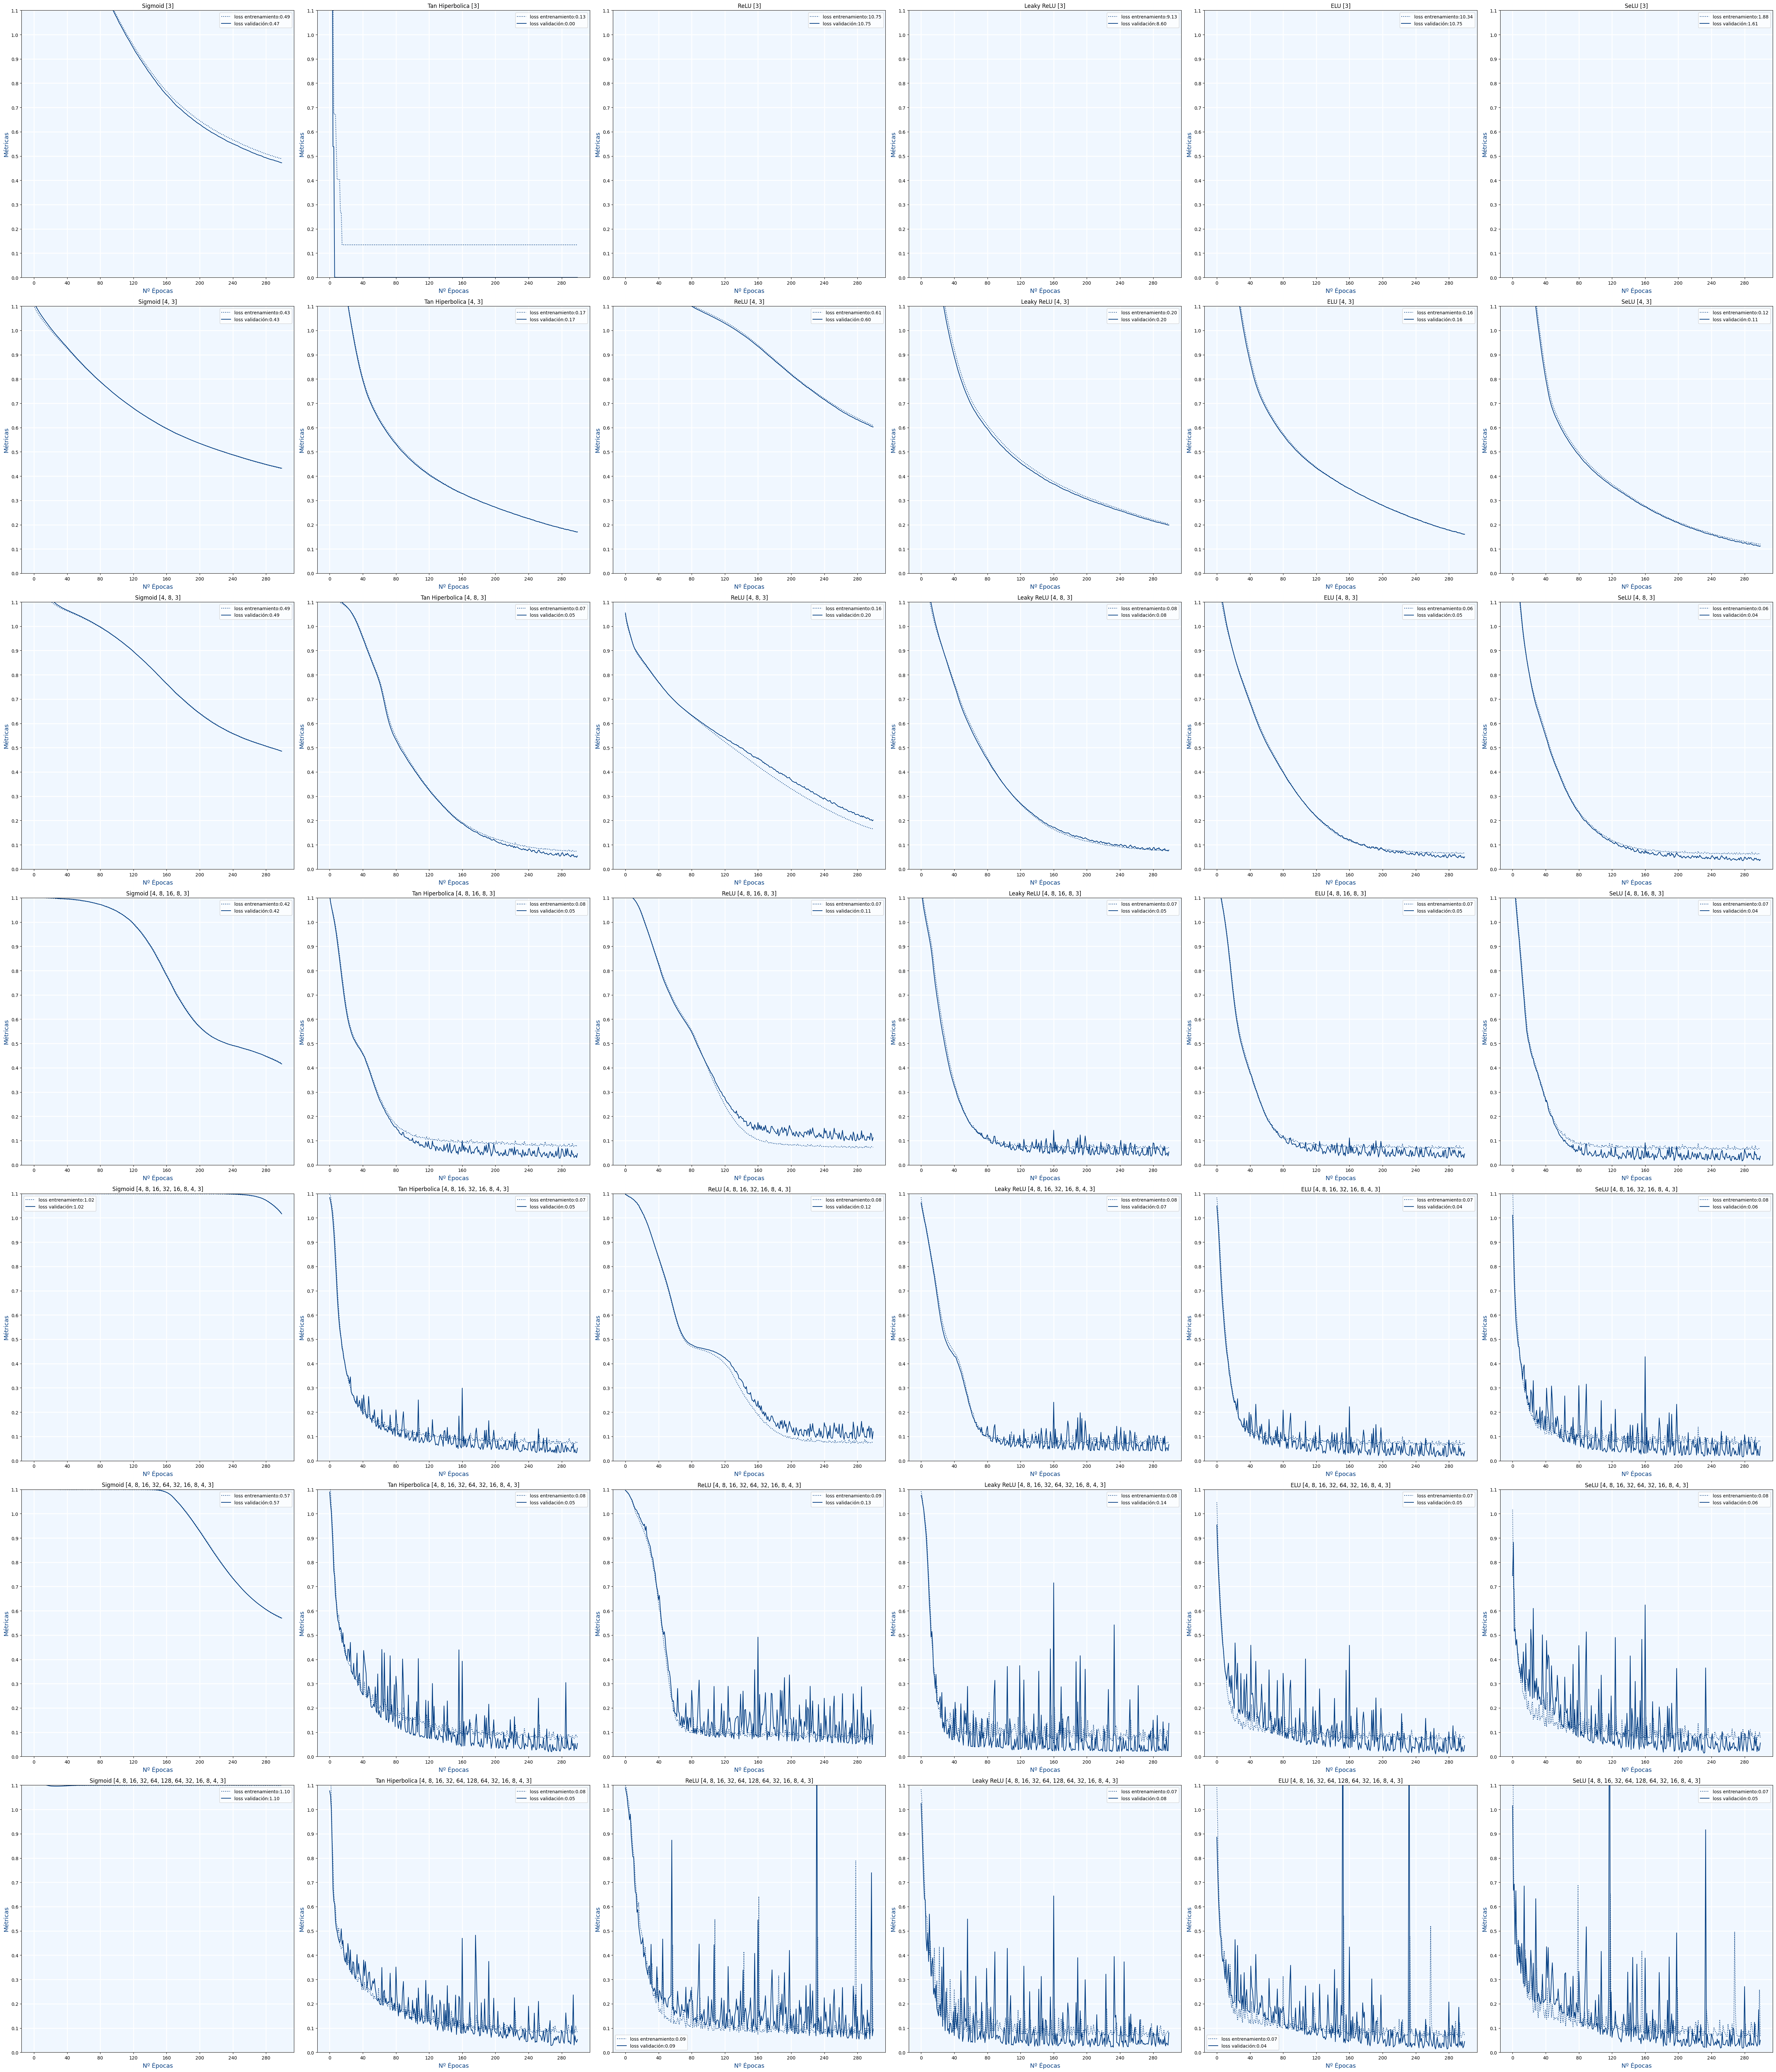

In [13]:
#Ejercicio 7
from sklearn.datasets import load_iris

def get_datos():
  datos=load_iris()
  x=datos.data
  y=datos.target
  label_binarizer = LabelBinarizer()
  label_binarizer.fit(range(max(y)+1))
  y = label_binarizer.transform(y)


  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test=get_datos()


epochs=300
redes_capas=[[3],[4,3],[4,8,3],[4,8,16,8,3],[4,8,16,32,16,8,4,3],[4,8,16,32,64,32,16,8,4,3],[4,8,16,32,64,128,64,32,16,8,4,3]]
activations=[
        ("Sigmoid","sigmoid"),
        ("Tan Hiperbolica","tanh"),
        ("ReLU","relu"),
        ("Leaky ReLU",tf.keras.layers.LeakyReLU()),
        ("ELU","elu"),
        ("SeLU","selu")]

figure=plt.figure(figsize=(9*len(activations), 9*len(redes_capas))) 

index=1
for capas in redes_capas:
  for caption,activation in activations:

    history,model=compile_fit(capas,activation,"sigmoid","categorical_crossentropy",epochs,x_train, x_test, y_train, y_test)
    axes = figure.add_subplot(len(redes_capas),len(activations),index)
    plot_metrics(axes,history.history,caption+ " " + str(capas))


    index=index+1

figure.tight_layout()

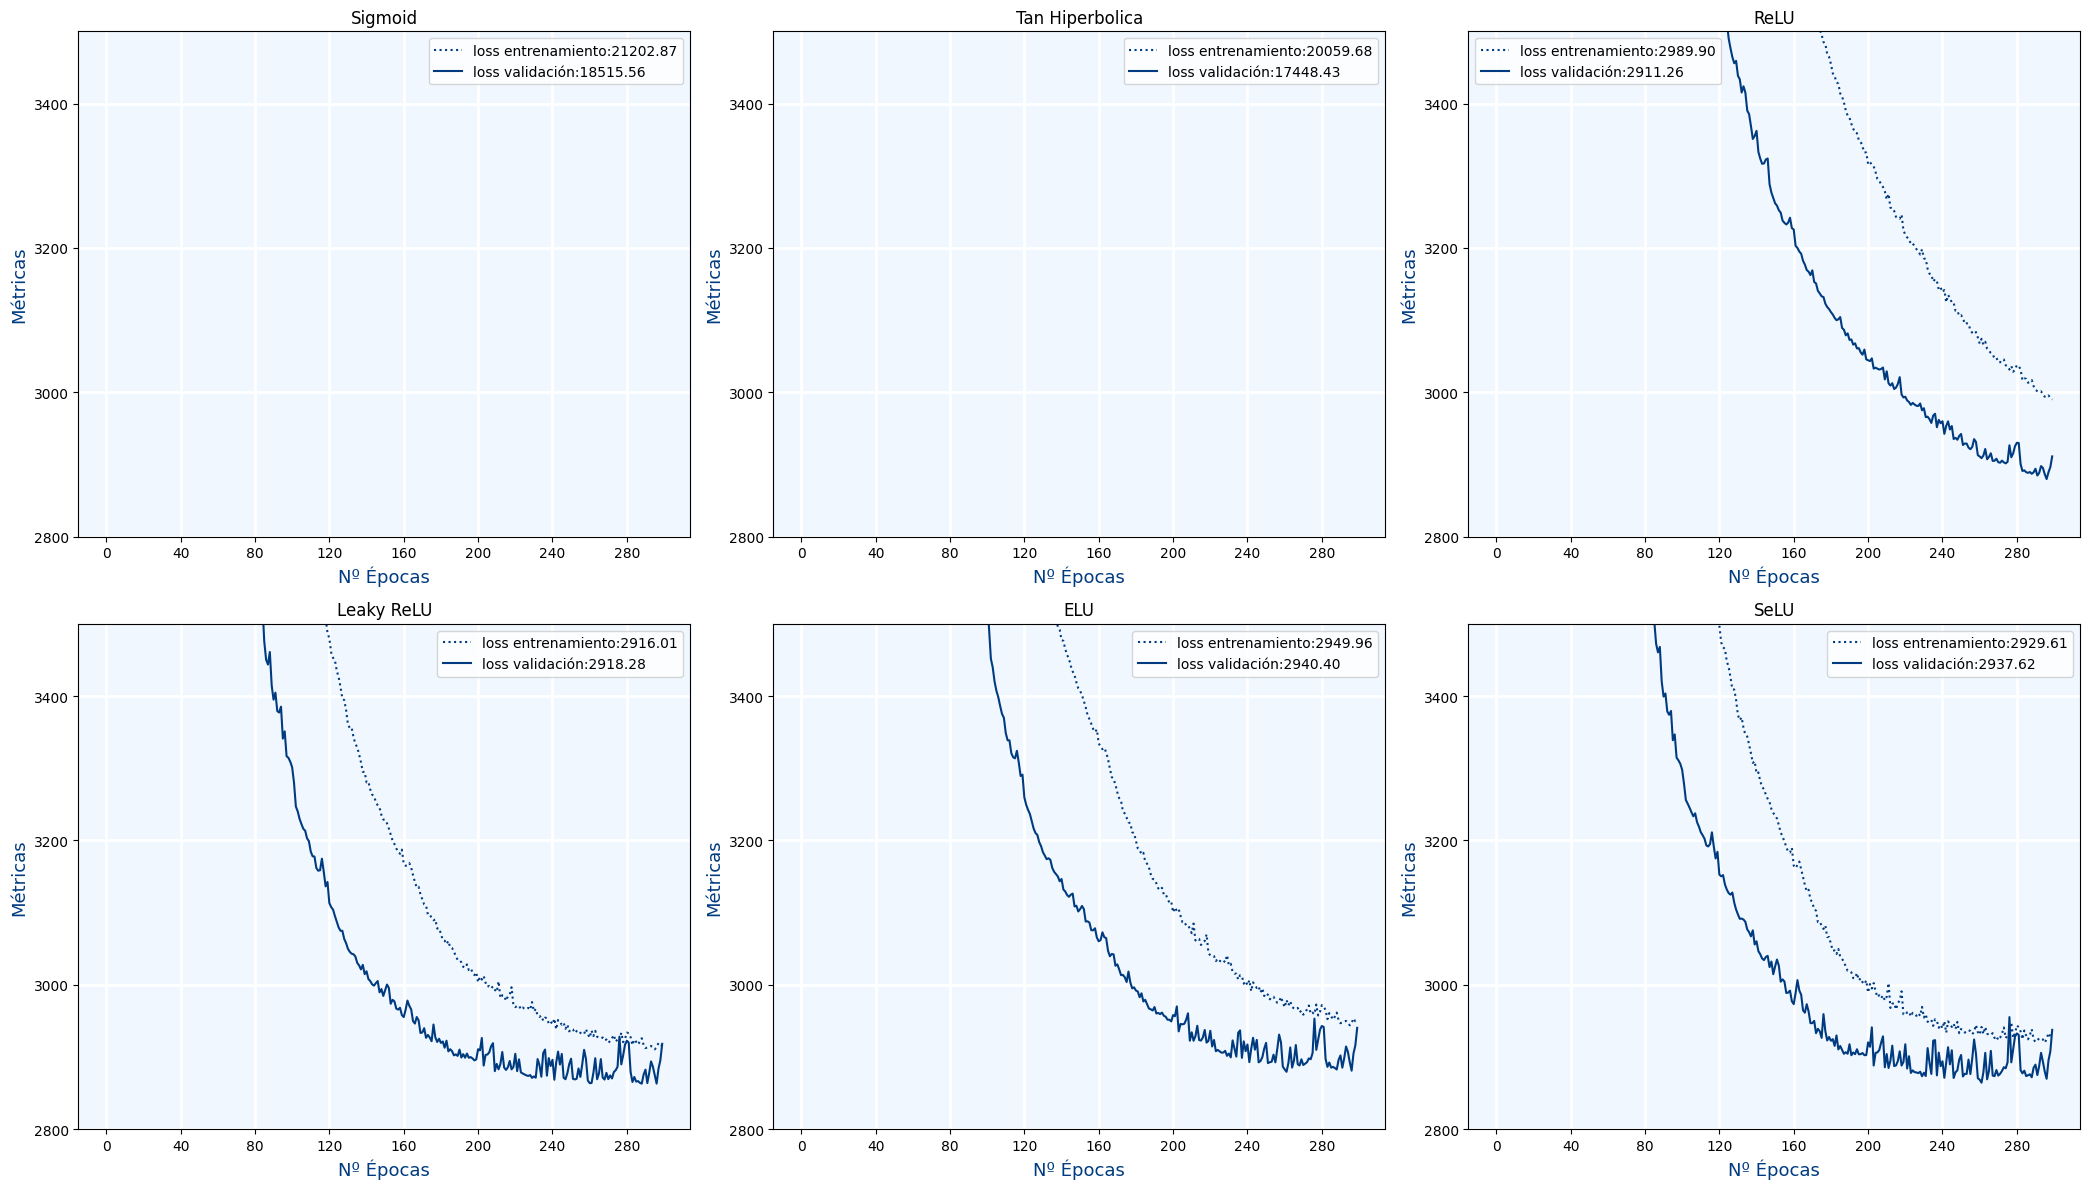

In [14]:
#Ejercicio 8.A
from sklearn.datasets import load_diabetes

def get_datos():
  datos=load_diabetes()
  x=datos.data
  y=datos.target

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test=get_datos()


epochs=300
capas=[4,8,16,8,1]
activations=[
        ("Sigmoid","sigmoid"),
        ("Tan Hiperbolica","tanh"),
        ("ReLU","relu"),
        ("Leaky ReLU",tf.keras.layers.LeakyReLU()),
        ("ELU","elu"),
        ("SeLU","selu")]
    

index=1
figure=plt.figure(figsize=(21, 12))
for caption,activation in activations:
  history,model=compile_fit(capas,activation,"linear","mse",epochs,x_train, x_test, y_train, y_test)
  axes = figure.add_subplot(2,3,index)
  plot_metrics(axes,history.history,caption)

  axes.set_ylim(ymin=2800,ymax=3500)
  axes.yaxis.set_major_locator(MultipleLocator(200))

  index=index+1

figure.tight_layout()

In [15]:
# Ejercicio 8.B
from sklearn.datasets import load_digits

def get_datos():
  datos=load_digits()
  x=datos.data
  y=datos.target
  label_binarizer = LabelBinarizer()
  label_binarizer.fit(range(max(y)+1))
  y = label_binarizer.transform(y)

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

  return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test=get_datos()

epochs=300
capas=[4,8,16,8,10]
activations=[
        ("Sigmoid","sigmoid"),
        ("Tan Hiperbolica","tanh"),
        ("ReLU","relu"),
        ("Leaky ReLU",tf.keras.layers.LeakyReLU()),
        ("ELU","elu"),
        ("SeLU","selu")]
    

index=1
figure=plt.figure(figsize=(21, 12))
for caption,activation in activations:
  history,model=compile_fit(capas,activation,"softmax","categorical_crossentropy",epochs,x_train, x_test, y_train, y_test)
  axes = figure.add_subplot(2,3,index)
  plot_metrics(axes,history.history,caption)
  index=index+1

figure.tight_layout()

In [ ]:
# Ejercicio 8.C
from sklearn.datasets import load_wine

def get_datos():
  datos=load_wine()
  x=datos.data
  y=datos.target
  label_binarizer = LabelBinarizer()
  label_binarizer.fit(range(max(y)+1))
  y = label_binarizer.transform(y)
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

  return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test=get_datos()
epochs=100
capas=[16,32,64,128,64,32,16,8,3]
activations=[
        ("Sigmoid","sigmoid"),
        ("Tan Hiperbolica","tanh"),
        ("ReLU","relu"),
        ("Leaky ReLU",tf.keras.layers.LeakyReLU()),
        ("ELU","elu"),
        ("SeLU","selu")]
    

index=1
figure=plt.figure(figsize=(21, 12))
for caption,activation in activations:
  history,model=compile_fit(capas,activation,"softmax","categorical_crossentropy",epochs,x_train, x_test, y_train, y_test)
  axes = figure.add_subplot(2,3,index)
  plot_metrics(axes,history.history,caption)
  index=index+1

figure.tight_layout()


In [ ]:
# Ejercicio 8.D
from sklearn.datasets import load_breast_cancer

def get_datos():
  datos=load_breast_cancer()
  x=datos.data
  y=datos.target
  label_binarizer = LabelBinarizer()
  label_binarizer.fit(range(max(y)+1))
  y = label_binarizer.transform(y)
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

  return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test=get_datos()
epochs=50
capas=[32,50,80,50,16,1]
activations=[
        ("Sigmoid","sigmoid"),
        ("Tan Hiperbolica","tanh"),
        ("ReLU","relu"),
        ("Leaky ReLU",tf.keras.layers.LeakyReLU()),
        ("ELU","elu"),
        ("SeLU","selu")]
    

index=1
figure=plt.figure(figsize=(21, 12))
for caption,activation in activations:
  history,model=compile_fit(capas,activation,"sigmoid","binary_crossentropy",epochs,x_train, x_test, y_train, y_test)
  axes = figure.add_subplot(2,3,index)
  plot_metrics(axes,history.history,caption)
  index=index+1

figure.tight_layout()